# Importing data
[train_med.csv](https://drive.google.com/file/d/1bwdczQJSWgyztyk54YW6qwoEesoTCfJH/view?usp=sharing)

[train_lw_rw.csv](https://drive.google.com/file/d/1iL8BeQ11IMTiKSnhlKMi402CU-BdXHyE/view?usp=sharing)

In [5]:
# !gdown --id 1bwdczQJSWgyztyk54YW6qwoEesoTCfJH
# !gdown --id 1iL8BeQ11IMTiKSnhlKMi402CU-BdXHyE

In [2]:
import numpy as np
import pandas as pd
import warnings

## Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

## Sklearn Libraries
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, \
            classification_report, recall_score, precision_recall_curve
from sklearn.preprocessing import label_binarize


random_state = 2021
np.random.seed(random_state)
warnings.filterwarnings('ignore')

In [13]:
# train=pd.read_csv(r'D:\Projects\Data_Science\DA open Hall 2021\dataset\train_med.csv')
train=pd.read_csv(r'D:\Projects\Data_Science\DA open Hall 2021\dataset\Train_final.csv')
train.head()

,Unnamed: 0,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity,release_month,dateofmonth
0,0,2015,0.949,0.235,0.0276,1,0.139125,5,0.4857,-24.28275,1,1947-01-01,0.0381,110.838,0.0398,1947,3.0,1,1,1
1,1,15901,0.855,0.456,0.4850,1,0.088400,4,0.1510,-10.04600,1,2020-11-13,0.0437,152.066,0.8590,2020,2.4,2,11,318
2,2,9002,0.827,0.495,0.4990,1,0.000000,0,0.4010,-8.00900,0,1950-01-01,0.0474,108.004,0.7090,1950,2.6,1,1,1
3,3,6734,0.654,0.643,0.4690,1,0.108000,7,0.2180,-15.91700,1,1974-04-30,0.0368,83.636,0.9640,1974,2.4,2,4,120
4,4,15563,0.738,0.705,0.3110,1,0.000000,5,0.3220,-12.34400,1,1973-01-01,0.0488,117.260,0.7850,1973,3.4,3,1,1


#Class Distribution

In [7]:
label_count = train.groupby('popularity', as_index = False).count()

In [8]:
class_name = list(label_count['popularity'])
count = list(label_count['id'])
print(count)

[3222, 3118, 2912, 2606, 369]


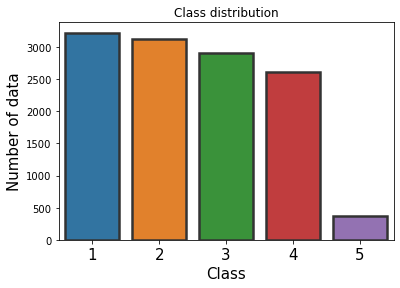

In [9]:
index = np.arange(len(class_name))
# plt.bar(class_name, count)
sns.barplot(x=class_name, y=count, linewidth=2.5, errcolor=".2", edgecolor=".2")
plt.xlabel('Class', fontsize=15)
plt.ylabel('Number of data', fontsize=15)
plt.xticks(index, class_name, fontsize=15)
plt.title('Class distribution')
plt.show()

In [11]:
train.head()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,duration-min,popularity,release_month,dateofmonth
0,0.949,0.235,0.0276,1,0.139125,5,0.4857,-24.28275,1,0.0381,110.838,0.0398,1947,3.0,1,1,1
1,0.855,0.456,0.4850,1,0.088400,4,0.1510,-10.04600,1,0.0437,152.066,0.8590,2020,2.4,2,11,318
2,0.827,0.495,0.4990,1,0.000000,0,0.4010,-8.00900,0,0.0474,108.004,0.7090,1950,2.6,1,1,1
3,0.654,0.643,0.4690,1,0.108000,7,0.2180,-15.91700,1,0.0368,83.636,0.9640,1974,2.4,2,4,120
4,0.738,0.705,0.3110,1,0.000000,5,0.3220,-12.34400,1,0.0488,117.260,0.7850,1973,3.4,3,1,1


In [14]:
id=train['id']
train=train.drop(['Unnamed: 0','id','release_date'],axis=1)
train.head()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,duration-min,popularity,release_month,dateofmonth
0,0.949,0.235,0.0276,1,0.139125,5,0.4857,-24.28275,1,0.0381,110.838,0.0398,1947,3.0,1,1,1
1,0.855,0.456,0.4850,1,0.088400,4,0.1510,-10.04600,1,0.0437,152.066,0.8590,2020,2.4,2,11,318
2,0.827,0.495,0.4990,1,0.000000,0,0.4010,-8.00900,0,0.0474,108.004,0.7090,1950,2.6,1,1,1
3,0.654,0.643,0.4690,1,0.108000,7,0.2180,-15.91700,1,0.0368,83.636,0.9640,1974,2.4,2,4,120
4,0.738,0.705,0.3110,1,0.000000,5,0.3220,-12.34400,1,0.0488,117.260,0.7850,1973,3.4,3,1,1


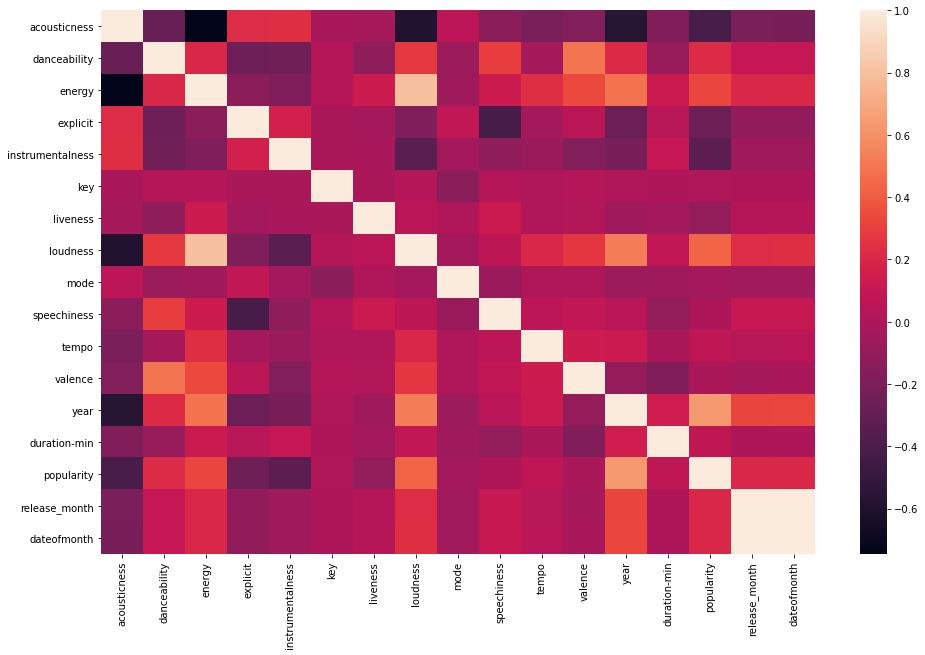

In [15]:
import seaborn as sns
cor = train.corr()
plt.figure(figsize=(16,10))
sns.heatmap(cor)
plt.show()

In [16]:
train_set,cross_val_set=train_test_split(train, test_size=0.3271)
xtrain = train_set.drop(['popularity'], axis=1)
ytrain = train_set['popularity'].values
x_cv=cross_val_set.drop(['popularity'], axis=1)
y_cv=cross_val_set['popularity'].values

In [17]:
font = {
    'family': 'serif', 
    'serif': ['Computer Modern Roman'],
    'weight' : 'regular',
    'size'   : 14
    }

plt.rc('font', **font)

In [18]:
class Create_ensemble(object):
    def __init__(self, n_splits, base_models):
        self.n_splits = n_splits
        self.base_models = base_models

    def predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)

        folds = list(StratifiedKFold(n_splits=self.n_splits, shuffle=True, 
                                     random_state = random_state).split(X, y))

        train_pred = np.zeros((X.shape[0], len(self.base_models)))
        test_pred = np.zeros((T.shape[0], len(self.base_models)* self.n_splits))
        f1_scores = np.zeros((len(self.base_models), self.n_splits))
        recall_scores = np.zeros((len(self.base_models), self.n_splits))
        
        test_col = 0
        for i, clf in enumerate(self.base_models):
            
            for j, (train_idx, valid_idx) in enumerate(folds):
                
                X_train = X[train_idx]
                Y_train = y[train_idx]
                X_valid = X[valid_idx]
                Y_valid = y[valid_idx]
                
                clf.fit(X_train, Y_train)
                
                valid_pred = clf.predict(X_valid)
                recall  = recall_score(Y_valid, valid_pred, average='macro')
                f1 = f1_score(Y_valid, valid_pred, average='macro')
                
                recall_scores[i][j] = recall
                f1_scores[i][j] = f1
                
                train_pred[valid_idx, i] = valid_pred
                test_pred[:, test_col] = clf.predict(T)
                test_col += 1
                
                print( "Model- {} and CV- {} recall: {}, f1_score: {}".format(i, j, recall, f1))
            
        return train_pred, test_pred, recall_scores, f1_scores

### using GridSearch to find optimal paramenters  
Random Hyperparameter Grid  
We start with a base model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

cv = StratifiedKFold(n_splits = 5, shuffle=True,random_state=2021)

rdf = RandomForestClassifier(random_state = 2021) 
base_models = [rdf]


n_splits = 5
lgb_stack = Create_ensemble(n_splits = n_splits, base_models = base_models)        

scoring = {'Recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)
          }

params = {'max_depth': [8, 10,15, 20], 
              'min_samples_split': [5, 10, 15],
              'min_samples_leaf' : [4, 8, 12],
              'n_estimators' : [400,500]
             }

grid_clf = GridSearchCV(estimator = rdf, param_grid = params, cv = cv, n_jobs=-1, verbose=4)
grid_clf.fit(xtrain, ytrain)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   38.1s


### We can view the best parameters from fitting the random search:

In [205]:
print(grid_clf.best_estimator_)
print(grid_clf.best_params_)

RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=15,
                       n_estimators=400, random_state=2021)
{'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 400}


In [206]:
rdf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=2021,
                       verbose=0, warm_start=False)

### prediction based on the best parameters

In [207]:
train_pred, test_pred, recall_scores, f1_scores = lgb_stack.predict(xtrain, ytrain, x_cv)

Model- 0 and CV- 0 recall: 0.5240721829360626, f1_score: 0.5347226313813022
Model- 0 and CV- 1 recall: 0.5244672971735646, f1_score: 0.5336631963049703
Model- 0 and CV- 2 recall: 0.5236306399824022, f1_score: 0.5307329504268068
Model- 0 and CV- 3 recall: 0.5178623019367999, f1_score: 0.5241304418904279
Model- 0 and CV- 4 recall: 0.5086620661543664, f1_score: 0.5155139430317712


In [208]:
print(test_pred)

[[2. 2. 3. 3. 2.]
 [4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4.]
 ...
 [2. 2. 2. 2. 2.]
 [3. 3. 2. 3. 2.]
 [1. 1. 1. 1. 1.]]


In [209]:
print('1. The F-1 score of the model {}\n'.format(f1_score(ytrain, train_pred, average='macro')))
print('2. The recall score of the model {}\n'.format(recall_score(ytrain, train_pred, average='macro')))
print('3. Classification report \n {} \n'.format(classification_report(ytrain, train_pred)))
print('4. Confusion matrix \n {} \n'.format(confusion_matrix(ytrain, train_pred)))

1. The F-1 score of the model 0.5284551048939975

2. The recall score of the model 0.5197530727603491

3. Classification report 
               precision    recall  f1-score   support

           1       0.83      0.81      0.82      2180
           2       0.55      0.70      0.62      2074
           3       0.47      0.41      0.43      1941
           4       0.58      0.57      0.58      1783
           5       0.62      0.12      0.20       249

    accuracy                           0.61      8227
   macro avg       0.61      0.52      0.53      8227
weighted avg       0.61      0.61      0.61      8227
 

4. Confusion matrix 
 [[1756  174   72  176    2]
 [ 201 1446  400   26    1]
 [  67  732  791  351    0]
 [  73  252  423 1020   15]
 [  15   10   12  183   29]] 



In [210]:
tpred = pd.DataFrame(test_pred)
final_tpred = tpred.mode(axis=1)

### Accuracy after part A

In [211]:
print('accuracy on cross validation set',sum(final_tpred[0]==y_cv)/final_tpred.shape[0])


accuracy on cross validation set 0.62325


In [212]:
final_tpred.to_csv('predicted_labels_1.csv', index=False, header= False)

In [213]:
class Create_ensemble(object):
    def __init__(self, n_splits, base_models):
        self.n_splits = n_splits
        self.base_models = base_models

    def predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)
        no_class = len(np.unique(y))

        folds = list(StratifiedKFold(n_splits=self.n_splits, shuffle=True, 
                                     random_state = random_state).split(X, y))

        train_proba = np.zeros((X.shape[0], no_class))
        test_proba = np.zeros((T.shape[0], no_class))
        
        train_pred = np.zeros((X.shape[0], len(self.base_models)))
        test_pred = np.zeros((T.shape[0], len(self.base_models)* self.n_splits))
        f1_scores = np.zeros((len(self.base_models), self.n_splits))
        recall_scores = np.zeros((len(self.base_models), self.n_splits))
        
        test_col = 0
        for i, clf in enumerate(self.base_models):
            
            for j, (train_idx, valid_idx) in enumerate(folds):
                
                X_train = X[train_idx]
                Y_train = y[train_idx]
                X_valid = X[valid_idx]
                Y_valid = y[valid_idx]
                
                clf.fit(X_train, Y_train)
                
                valid_pred = clf.predict(X_valid)
                recall  = recall_score(Y_valid, valid_pred, average='macro')
                f1 = f1_score(Y_valid, valid_pred, average='macro')
                
                recall_scores[i][j] = recall
                f1_scores[i][j] = f1
                
                train_pred[valid_idx, i] = valid_pred
                test_pred[:, test_col] = clf.predict(T)
                test_col += 1
                
                ## Probabilities
                valid_proba = clf.predict_proba(X_valid)
                train_proba[valid_idx, :] = valid_proba
                test_proba  += clf.predict_proba(T)
                
                print( "Model- {} and CV- {} recall: {}, f1_score: {}".format(i, j, recall, f1))
                
            test_proba /= self.n_splits
            
        return train_proba, test_proba, train_pred, test_pred

In [214]:
from sklearn.ensemble import RandomForestClassifier
class_weight = {1:1, 2:1.1, 3:1.1, 4:1.2, 5:4}

rdf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=class_weight,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=2021,
                       verbose=0, warm_start=False)

In [215]:
base_models = [rdf]
n_splits = 5
lgb_stack = Create_ensemble(n_splits = n_splits, base_models = base_models)        

xtrain = train.drop(['popularity'], axis=1)
ytrain = train['popularity'].values
# ytrain = label_binarize(Y, classes=[0, 1, 2])

In [216]:
train_proba, test_proba, train_pred, test_pred = lgb_stack.predict(xtrain, ytrain, x_cv)

Model- 0 and CV- 0 recall: 0.554682992575551, f1_score: 0.5657969007377155
Model- 0 and CV- 1 recall: 0.5751321713662696, f1_score: 0.5837535690673729
Model- 0 and CV- 2 recall: 0.575853144474825, f1_score: 0.5865239896876114
Model- 0 and CV- 3 recall: 0.5543424737419387, f1_score: 0.5627558234815263
Model- 0 and CV- 4 recall: 0.538388000904616, f1_score: 0.55349991239363


In [217]:
print('1. The F-1 score of the model {}\n'.format(f1_score(ytrain, train_pred, average='macro')))
print('2. The recall score of the model {}\n'.format(recall_score(ytrain, train_pred, average='macro')))
print('3. Classification report \n {} \n'.format(classification_report(ytrain, train_pred)))
print('4. Confusion matrix \n {} \n'.format(confusion_matrix(ytrain, train_pred)))

1. The F-1 score of the model 0.5710363960786697

2. The recall score of the model 0.5596431856549133

3. Classification report 
               precision    recall  f1-score   support

           1       0.85      0.77      0.81      3222
           2       0.55      0.72      0.63      3118
           3       0.50      0.43      0.46      2912
           4       0.60      0.59      0.59      2606
           5       0.49      0.30      0.37       369

    accuracy                           0.62     12227
   macro avg       0.60      0.56      0.57     12227
weighted avg       0.63      0.62      0.62     12227
 

4. Confusion matrix 
 [[2479  314  107  297   25]
 [ 297 2238  548   30    5]
 [  73 1107 1239  493    0]
 [  56  371  557 1538   84]
 [   6   13   16  225  109]] 



In [218]:
tpred = pd.DataFrame(test_pred)
final_tpred = tpred.mode(axis=1)

## Accuracy after part B

In [219]:
print('accuracy on cross validation set',sum(final_tpred[0]==y_cv)/final_tpred.shape[0])

accuracy on cross validation set 0.8505


In [221]:
class_=np.zeros(5)
class_pred_=class_.copy()
i=0
while i<y_cv.shape[0]:
    if(y_cv[i]==final_tpred.values[i][0]):
        class_pred_[int(final_tpred.values[i][0])-1]+=1
    class_[y_cv[i]-1]+=1
    i=i+1
print(class_)
print(class_pred_)

[1042. 1044.  971.  823.  120.]
[891. 943. 792. 667. 109.]


In [225]:
final_tpred[0].values
i=0
bid=0
revenue=0
while i<len(y_cv):
    if(y_cv[i]<=final_tpred[0].values[i]):
        bid+=final_tpred[0].values[i]
        revenue+=y_cv[i]*2
    i=i+1
print(bid,revenue)

9234.0 17604


In [226]:
print(len(y_cv))

4000


In [32]:
final_tpred.to_csv('predicted_labels_2.csv', index=False, header= False)

# Part C(not complete)

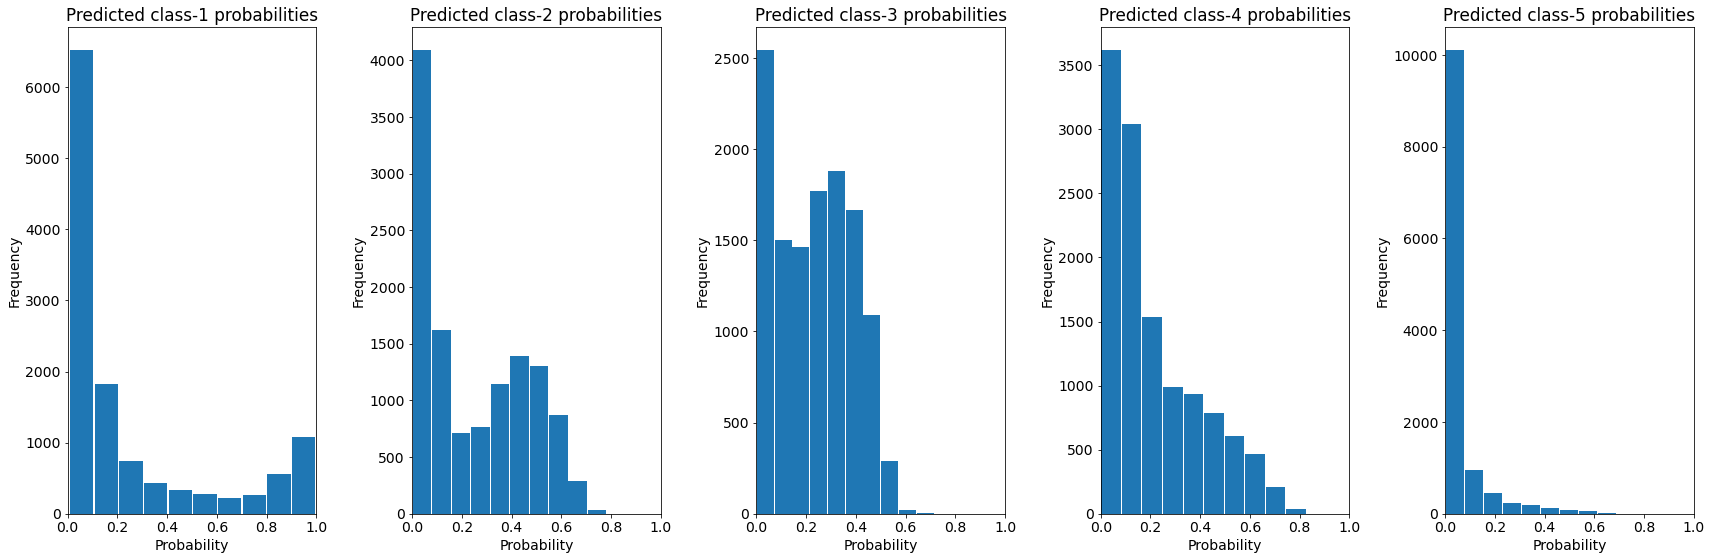

In [138]:
# histogram of predicted probabilities
plt.figure(figsize=(24, 8))
nclasses = 5
for i in range(nclasses):
    
    plt.subplot(1, 5, i+1)
    plt.hist(train_proba[:, i], bins=10, histtype='bar', rwidth=0.95)
    plt.xlim(0,1)
    plt.title('Predicted class-{} probabilities'.format(i+1))
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [109]:
df_test=pd.read_csv('D:\Projects\Data_Science\DA open Hall 2021\dataset\Test_data.csv')
df_test.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min
0,4943,0.03360,0.523,0.861,No,0.000000,0,0.1440,-3.447,Major,01-01-2014,0.0644,127.049,0.346,2014,3.8
1,16165,0.76500,0.687,0.453,No,0.000008,7,0.0897,-11.649,Major,01-04-1972,0.0335,129.987,0.830,1972,3.8
2,6774,0.36300,0.536,0.640,No,0.000000,0,0.0948,-5.862,Major,02-06-1998,0.0368,142.483,0.289,1998,4.4
3,9959,0.00463,0.890,0.617,No,0.003850,2,0.0291,-12.096,Minor,08-09-1980,0.0418,121.126,0.970,1980,3.9
4,13818,0.00187,0.555,0.943,No,0.000042,2,0.1510,-2.492,Major,17-04-2007,0.0891,165.026,0.882,2007,3.2


In [65]:
# df_test.drop(['id','release_date'],axis=1,inplace=True)
dict={'mode':{'Major':1,'Minor':0},'explicit':{'Yes':1,'No':0}}
df_test.replace(dict,inplace=True)
df_test

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,duration-min
0,0.03360,0.523,0.861,0,0.000000,0,0.1440,-3.447,1,0.0644,127.049,0.346,2014,3.8
1,0.76500,0.687,0.453,0,0.000008,7,0.0897,-11.649,1,0.0335,129.987,0.830,1972,3.8
2,0.36300,0.536,0.640,0,0.000000,0,0.0948,-5.862,1,0.0368,142.483,0.289,1998,4.4
3,0.00463,0.890,0.617,0,0.003850,2,0.0291,-12.096,0,0.0418,121.126,0.970,1980,3.9
4,0.00187,0.555,0.943,0,0.000042,2,0.1510,-2.492,1,0.0891,165.026,0.882,2007,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.00019,0.272,0.907,0,0.039300,4,0.1860,-4.592,0,0.0707,177.225,0.564,1981,3.5
3996,0.10600,0.444,0.819,0,0.000000,10,0.1070,-4.078,0,0.3410,82.695,0.747,2017,3.1
3997,0.64900,0.556,0.393,0,0.000000,0,0.2920,-10.427,1,0.0319,98.226,0.604,1994,3.3
3998,0.99500,0.378,0.064,0,0.929000,7,0.1350,-19.040,0,0.0414,98.456,0.158,1946,2.6


In [94]:
train_proba, test_proba, train_pred, test_pred = lgb_stack.predict(xtrain, ytrain, df_test)

Model- 0 and CV- 0 recall: 0.554682992575551, f1_score: 0.5657969007377155
Model- 0 and CV- 1 recall: 0.5751321713662696, f1_score: 0.5837535690673729
Model- 0 and CV- 2 recall: 0.575853144474825, f1_score: 0.5865239896876114
Model- 0 and CV- 3 recall: 0.5543424737419387, f1_score: 0.5627558234815263
Model- 0 and CV- 4 recall: 0.538388000904616, f1_score: 0.55349991239363


In [95]:
tpred = pd.DataFrame(test_pred)
final_tpred = tpred.mode(axis=1)

In [96]:
# class_=np.zeros(5)
# class_pred_=class_.copy()
# i=0
# while i<y_cv.shape[0]:
#     if(y_cv[i]==final_tpred.values[i][0]):
#         class_pred_[int(final_tpred.values[i][0])-1]+=1
#     class_[y_cv[i]-1]+=1
#     i=i+1
# print(class_)
# print(class_pred_)
class_=np.zeros(5)
for i in range(final_tpred.values.shape[0]):
    class_[int(final_tpred.values[i][0]-1)]+=1
    i+=1
class_

array([ 965., 1335.,  768.,  836.,   96.])

In [84]:
bid=0
i=0
while(i<5):
    bid+=class_[i]*(i+1)
    i=i+1
print(bid)

9763.0


In [97]:
final_tpred

,0,1
0,4.0,NaN
1,2.0,NaN
2,3.0,NaN
3,2.0,NaN
4,4.0,NaN
...,...,...
3995,2.0,NaN
3996,4.0,NaN
3997,3.0,NaN
3998,1.0,NaN


In [115]:
df.to_csv('random_forest_testset_med.csv')

In [93]:
final_tpred.shape()

(3999, 2)

In [116]:
df=pd.read_csv('random_forest_testset_med.csv')
# df.drop('Unnamed: 2',axis=1,inplace=True)
df.head()


,id,popularity
0,4943,high
1,16165,low
2,6774,average
3,9959,low
4,13818,high


In [112]:
df['id']=df_test['id']

In [107]:
dict={1:'very low',2:'low',3:'average',4:'high',5:'very high'}
df['popularity'].replace(dict,inplace=True)

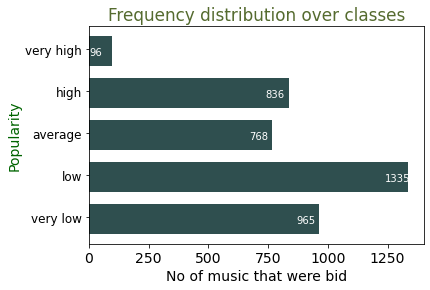

In [193]:
import os
import numpy as np
import matplotlib.pyplot as plt

x = ['very low', 'low', 'average', 'high', 'very high']

y = [int(x) for x in  class_]

fig, ax = plt.subplots()    
width = 0.7 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="darkslategrey")
ax.set_yticks(ind+width/2-0.3)
ax.set_yticklabels(x, minor=False,fontsize=12)
plt.title('Frequency distribution over classes',color='darkolivegreen')
plt.xlabel('No of music that were bid')
plt.ylabel('Popularity',color='darkgreen')      
for i, v in enumerate(y):
    ax.text(v - 96, i - .1, str(v), color='white',fontsize=10)

plt.savefig('random_forest_testset_med.png', dpi=300, format='png', bbox_inches='tight')
plt.show()


In [ ]:
def re_predict(data, threshods):

    argmax = np.argmax(data)

    ## If the argmax is 2 (class-3) then ovbiously return this highest label
    if argmax == 2: 
        return (argmax +1)

    # If argmax is 1 (class-2) there is a chnace that, label is class-2 if
    # the probability of the class is greater than the threshold otherwise obviously
    # return this highest label (class-3)
    elif argmax == 1:
        if data[argmax] >= threshods[argmax] : 
            return (argmax +1)
        else:
            return (argmax +2)

    # If the argmax is 0 (class-1) then there are chances that label is class-1 if
    # the probability of the class is greater than the threshold otherwise label can be
    # either next two highest labels (class-2 or class-3). To determine the exact class
    # class, we have to consider four cases.
    # case A : if class_2_prob >= threshold and class_3_prob < threshold then pick class-2
    # case B : if class_3_prob >= threshold and class_2_prob < threshold then pick class-3
    # case C : if class_2_prob < threshold and class_3_prob < threshold then pick class-1
    # case D : if class_2_prob > threshold and class_3_prob > threshold then pick class-3

    elif argmax == 0:

        if data[argmax] >= threshods[argmax] : 
            return (argmax +1)
        else:
            # case A : if class_2_prob >= threshold and class_3_prob < threshold then pick class-2
            if data[argmax + 1] >= threshods[argmax + 1] and data[argmax + 2] < threshods[argmax + 2]:
                return (argmax + 2)

            # case B : if class_3_prob >= threshold and class_2_prob < threshold then pick class-3
            if data[argmax + 2] >= threshods[argmax + 2] and data[argmax + 1] < threshods[argmax + 1]:
                return (argmax + 3)

            # case C : if class_2_prob < threshold and class_3_prob < threshold then pick class-1
            if data[argmax + 1] < threshods[argmax + 1] and data[argmax + 2] < threshods[argmax + 2]:
                return (argmax + 1)

            # case D : if class_2_prob > threshold and class_3_prob > threshold then pick class-3
            if data[argmax + 1] > threshods[argmax + 1] and data[argmax + 2] > threshods[argmax + 2]:
                return (argmax + 3)

In [ ]:
y =  label_binarize(ytrain, classes=[1, 2, 3 ,4 ,5])
_, _, th1 = roc_curve(y[:, 0], train_proba[:, 0])
_, _, th2 = roc_curve(y[:, 1], train_proba[:, 1])
_, _, th3 = roc_curve(y[:, 2], train_proba[:, 2])
_, _, th4 = roc_curve(y[:, 3], train_proba[:, 3])
_, _, th5 = roc_curve(y[:, 4], train_proba[:, 4])

In [ ]:
print(np.median(th1))
print(np.median(th2))
print(np.median(th3))
print(np.median(th4))
print(np.median(th5))

In [ ]:
threshold = [0.21,0.38,0.32,0.29,0.30]
new_pred = []
for i in range(train_pred.shape[0]):
    new_pred.append(re_predict(train_proba[i, :], threshold))

In [ ]:
print('1. The F-1 score of the model {}\n'.format(f1_score(ytrain, new_pred, average='macro')))
print('2. The recall score of the model {}\n'.format(recall_score(ytrain, new_pred, average='macro')))
print('3. Classification report \n {} \n'.format(classification_report(ytrain, new_pred)))
print('4. Confusion matrix \n {} \n'.format(confusion_matrix(ytrain, new_pred)))

In [ ]:
test_proba.shape

In [ ]:
final_tpred_prob3 = []
for i in range(test_proba.shape[0]):
    final_tpred_prob3.append(re_predict(test_proba[i, :], threshold))

In [ ]:
tpred_prob3 = pd.DataFrame(final_tpred_prob3)
tpred_prob3.to_csv('final.csv', index=False, header=False)

In [ ]:
tpred_prob3